In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])
%matplotlib inline

## Load results

In [101]:
all_out = glob('out/**/*.pkl')

In [102]:
all_out = [load_pickle(p) for p in all_out]

In [103]:
extracted_res = []

ohe_tanimoto_res = []
rxnfp_linear_res = []
rxnfp_rbf_res = []
drfp_linear_res = []
drfp_rbf_res = []

for out in all_out: 
    res = {
        'train_size': out['train_size'],
        'frac_valid': out['frac_valid'],
        'accuracy': out['accuracy'],
        'f1_macro': out['f1_macro'],
        'f1_micro': out['f1_micro'],
        'kappa': out['kappa'],
        "num_classes": out['num_classes'],
        'one_hot': out['one_hot']
    }

    res_ohe_tanimoto = {
        'frac_valid': out['baseline']['metrics']['ohe-tanimoto']['frac_valid'],
        'accuracy': out['baseline']['metrics']['ohe-tanimoto']['accuracy'],
        'f1_macro': out['baseline']['metrics']['ohe-tanimoto']['f1_macro'],
        'f1_micro': out['baseline']['metrics']['ohe-tanimoto']['f1_micro'],
        'kappa': out['baseline']['metrics']['ohe-tanimoto']['kappa'],
        "num_classes": out['num_classes'],
        'train_size': out['train_size']
    }

    res_rxnfp_linear = {
        'frac_valid': out['baseline']['metrics']['rxnfp-linear']['frac_valid'],
        'accuracy': out['baseline']['metrics']['rxnfp-linear']['accuracy'],
        'f1_macro': out['baseline']['metrics']['rxnfp-linear']['f1_macro'],
        'f1_micro': out['baseline']['metrics']['rxnfp-linear']['f1_micro'],
        'kappa': out['baseline']['metrics']['rxnfp-linear']['kappa'],
        "num_classes": out['num_classes'],
        'train_size': out['train_size']
    }


    res_rxnfp_rbf = {
        'frac_valid': out['baseline']['metrics']['rxnfp-rbf']['frac_valid'],
        'accuracy': out['baseline']['metrics']['rxnfp-rbf']['accuracy'],
        'f1_macro': out['baseline']['metrics']['rxnfp-rbf']['f1_macro'],
        'f1_micro': out['baseline']['metrics']['rxnfp-rbf']['f1_micro'],
        'kappa': out['baseline']['metrics']['rxnfp-rbf']['kappa'],
        "num_classes": out['num_classes'],
        'train_size': out['train_size']
    }


    res_drfp_rbf = {
        'frac_valid': out['baseline']['metrics']['drfp-rbf']['frac_valid'],
        'accuracy': out['baseline']['metrics']['drfp-rbf']['accuracy'],
        'f1_macro': out['baseline']['metrics']['drfp-rbf']['f1_macro'],
        'f1_micro': out['baseline']['metrics']['drfp-rbf']['f1_micro'],
        'kappa': out['baseline']['metrics']['drfp-rbf']['kappa'],
        "num_classes": out['num_classes'],
        'train_size': out['train_size']
    }

    res_drfp_linear = {
        'frac_valid': out['baseline']['metrics']['drfp-linear']['frac_valid'],
        'accuracy': out['baseline']['metrics']['drfp-linear']['accuracy'],
        'f1_macro': out['baseline']['metrics']['drfp-linear']['f1_macro'],
        'f1_micro': out['baseline']['metrics']['drfp-linear']['f1_micro'],
        'kappa': out['baseline']['metrics']['drfp-linear']['kappa'],
        "num_classes": out['num_classes'],
        'train_size': out['train_size']
    }

    extracted_res.append(res)

    ohe_tanimoto_res.append(res_ohe_tanimoto)


    rxnfp_linear_res.append(res_rxnfp_linear)

    rxnfp_rbf_res.append(res_rxnfp_rbf)

    drfp_linear_res.append(res_drfp_linear)

    drfp_rbf_res.append(res_drfp_rbf)

In [104]:
extracted_res = pd.DataFrame(extracted_res)
ohe_tanimoto_res = pd.DataFrame(ohe_tanimoto_res)
rxnfp_linear_res = pd.DataFrame(rxnfp_linear_res)
rxnfp_rbf_res = pd.DataFrame(rxnfp_rbf_res)
drfp_linear_res = pd.DataFrame(drfp_linear_res)
drfp_rbf_res = pd.DataFrame(drfp_rbf_res)

In [105]:
extracted_res

,train_size,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,one_hot
0,20,1.0,0.20,0.215298,0.20,0.00,5,True
1,20,1.0,0.60,0.594156,0.60,0.20,2,True
2,10,1.0,0.52,0.507389,0.52,0.04,2,True
3,10,1.0,0.28,0.255746,0.28,0.10,5,True


In [106]:
ohe_tanimoto_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.37,0.321314,0.37,0.2125,5,20
1,1.0,0.59,0.557761,0.59,0.1800,2,20
2,1.0,0.50,0.333333,0.50,0.0000,2,10
3,1.0,0.30,0.246715,0.30,0.1250,5,10


In [107]:
rxnfp_linear_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.28,0.210100,0.28,0.100,5,20
1,1.0,0.50,0.333333,0.50,0.000,2,20
2,1.0,0.50,0.333333,0.50,0.000,2,10
3,1.0,0.26,0.167890,0.26,0.075,5,10


In [108]:
rxnfp_rbf_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.31,0.254625,0.31,0.1375,5,20
1,1.0,0.52,0.500000,0.52,0.0400,2,20
2,1.0,0.49,0.478261,0.49,-0.0200,2,10
3,1.0,0.28,0.213253,0.28,0.1000,5,10


In [109]:
drfp_linear_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.42,0.421887,0.42,0.275,5,20
1,1.0,0.64,0.625000,0.64,0.280,2,20
2,1.0,0.50,0.333333,0.50,0.000,2,10
3,1.0,0.38,0.383037,0.38,0.225,5,10


In [110]:
drfp_rbf_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.2,0.066667,0.2,0.0,5,20
1,1.0,0.5,0.333333,0.5,0.0,2,20
2,1.0,0.5,0.333333,0.5,0.0,2,10
3,1.0,0.2,0.066667,0.2,0.0,5,10


In [111]:
grouped_extracted_res= extracted_res.groupby(['num_classes', 'train_size', 'one_hot']).agg(['mean', 'std'])

grouped_ohe_tanimoto_res = ohe_tanimoto_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])
grouped_rxnfp_linear_res = rxnfp_linear_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])
grouped_rxnfp_rbf_res = rxnfp_rbf_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])
grouped_drfp_linear_res = drfp_linear_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])
grouped_drfp_rbf_res = drfp_rbf_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

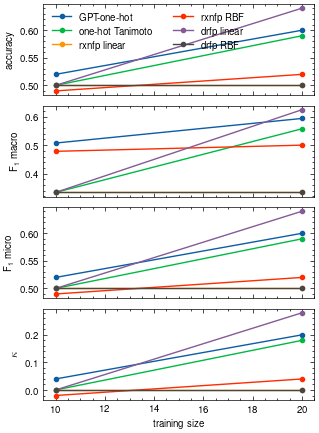

In [113]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_extracted_res.loc[2,:, True].index,
        grouped_extracted_res.loc[2,:, True][metric]['mean'],
        marker='o',
        label='GPT-one-hot',
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[2,:,True].index,
        grouped_extracted_res.loc[2,:, True][metric]['mean'] - grouped_extracted_res.loc[2,:, True][metric]['std'],
        grouped_extracted_res.loc[2,:, True][metric]['mean'] + grouped_extracted_res.loc[2,:, True][metric]['std'],
        alpha=0.2,
    )


    # ax[i].plot(
    #     grouped_extracted_res.loc[2,:, False].index,
    #     grouped_extracted_res.loc[2,:, False][metric]['mean'],
    #     marker='o',
    #     label='GPT',
    # )
    # ax[i].fill_between(
    #     grouped_extracted_res.loc[2,:,False].index,
    #     grouped_extracted_res.loc[2,:, False][metric]['mean'] - grouped_extracted_res.loc[2,:, False][metric]['std'],
    #     grouped_extracted_res.loc[2,:, False][metric]['mean'] + grouped_extracted_res.loc[2,:, False][metric]['std'],
    #     alpha=0.2,
    # )


    ax[i].plot(
        grouped_ohe_tanimoto_res.loc[2,:].index,
        grouped_ohe_tanimoto_res.loc[2,:][metric]['mean'],
        marker='o',
        label='one-hot Tanimoto',
    )
    ax[i].fill_between(
        grouped_ohe_tanimoto_res.loc[2,:].index,
        grouped_ohe_tanimoto_res.loc[2,:][metric]['mean'] - grouped_ohe_tanimoto_res.loc[2,:][metric]['std'],
        grouped_ohe_tanimoto_res.loc[2,:][metric]['mean'] + grouped_ohe_tanimoto_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_linear_res.loc[2,:].index,
        grouped_rxnfp_linear_res.loc[2,:][metric]['mean'],
        marker='o',
        label='rxnfp linear',
    )
    ax[i].fill_between(
        grouped_rxnfp_linear_res.loc[2,:].index,
        grouped_rxnfp_linear_res.loc[2,:][metric]['mean'] - grouped_rxnfp_linear_res.loc[2,:][metric]['std'],
        grouped_rxnfp_linear_res.loc[2,:][metric]['mean'] + grouped_rxnfp_linear_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_rbf_res.loc[2,:].index,
        grouped_rxnfp_rbf_res.loc[2,:][metric]['mean'],
        marker='o',
        label='rxnfp RBF',
    )
    ax[i].fill_between(
        grouped_rxnfp_rbf_res.loc[2,:].index,
        grouped_rxnfp_rbf_res.loc[2,:][metric]['mean'] - grouped_rxnfp_rbf_res.loc[2,:][metric]['std'],
        grouped_rxnfp_rbf_res.loc[2,:][metric]['mean'] + grouped_rxnfp_rbf_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_drfp_linear_res.loc[2,:].index,
        grouped_drfp_linear_res.loc[2,:][metric]['mean'],
        marker='o',
        label='drfp linear',
    )
    ax[i].fill_between(
        grouped_drfp_linear_res.loc[2,:].index,
        grouped_drfp_linear_res.loc[2,:][metric]['mean'] - grouped_drfp_linear_res.loc[2,:][metric]['std'],
        grouped_drfp_linear_res.loc[2,:][metric]['mean'] + grouped_drfp_linear_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_rbf_res.loc[2,:].index,
        grouped_drfp_rbf_res.loc[2,:][metric]['mean'],
        marker='o',
        label='drfp RBF',
    )
    ax[i].fill_between(
        grouped_drfp_rbf_res.loc[2,:].index,
        grouped_drfp_rbf_res.loc[2,:][metric]['mean'] - grouped_drfp_rbf_res.loc[2,:][metric]['std'],
        grouped_drfp_rbf_res.loc[2,:][metric]['mean'] + grouped_drfp_rbf_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )


ax[-1].set_xlabel('training size')
ax[0].legend(ncols=2)

ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('rxn-doyle-classification_results_2.pdf', bbox_inches='tight')

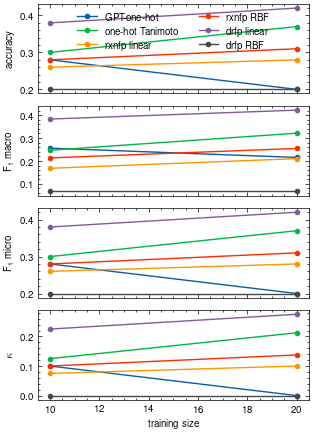

In [114]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_extracted_res.loc[5,:, True].index,
        grouped_extracted_res.loc[5,:, True][metric]['mean'],
        marker='o',
        label='GPT-one-hot',
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[5,:,True].index,
        grouped_extracted_res.loc[5,:, True][metric]['mean'] - grouped_extracted_res.loc[5,:, True][metric]['std'],
        grouped_extracted_res.loc[5,:, True][metric]['mean'] + grouped_extracted_res.loc[5,:, True][metric]['std'],
        alpha=0.2,
    )


    # ax[i].plot(
    #     grouped_extracted_res.loc[5,:, False].index,
    #     grouped_extracted_res.loc[5,:, False][metric]['mean'],
    #     marker='o',
    #     label='GPT',
    # )
    # ax[i].fill_between(
    #     grouped_extracted_res.loc[5,:,False].index,
    #     grouped_extracted_res.loc[5,:, False][metric]['mean'] - grouped_extracted_res.loc[5,:, False][metric]['std'],
    #     grouped_extracted_res.loc[5,:, False][metric]['mean'] + grouped_extracted_res.loc[5,:, False][metric]['std'],
    #     alpha=0.2,
    # )


    ax[i].plot(
        grouped_ohe_tanimoto_res.loc[5,:].index,
        grouped_ohe_tanimoto_res.loc[5,:][metric]['mean'],
        marker='o',
        label='one-hot Tanimoto',
    )
    ax[i].fill_between(
        grouped_ohe_tanimoto_res.loc[5,:].index,
        grouped_ohe_tanimoto_res.loc[5,:][metric]['mean'] - grouped_ohe_tanimoto_res.loc[5,:][metric]['std'],
        grouped_ohe_tanimoto_res.loc[5,:][metric]['mean'] + grouped_ohe_tanimoto_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_linear_res.loc[5,:].index,
        grouped_rxnfp_linear_res.loc[5,:][metric]['mean'],
        marker='o',
        label='rxnfp linear',
    )
    ax[i].fill_between(
        grouped_rxnfp_linear_res.loc[5,:].index,
        grouped_rxnfp_linear_res.loc[5,:][metric]['mean'] - grouped_rxnfp_linear_res.loc[5,:][metric]['std'],
        grouped_rxnfp_linear_res.loc[5,:][metric]['mean'] + grouped_rxnfp_linear_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_rbf_res.loc[5,:].index,
        grouped_rxnfp_rbf_res.loc[5,:][metric]['mean'],
        marker='o',
        label='rxnfp RBF',
    )
    ax[i].fill_between(
        grouped_rxnfp_rbf_res.loc[5,:].index,
        grouped_rxnfp_rbf_res.loc[5,:][metric]['mean'] - grouped_rxnfp_rbf_res.loc[5,:][metric]['std'],
        grouped_rxnfp_rbf_res.loc[5,:][metric]['mean'] + grouped_rxnfp_rbf_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_drfp_linear_res.loc[5,:].index,
        grouped_drfp_linear_res.loc[5,:][metric]['mean'],
        marker='o',
        label='drfp linear',
    )
    ax[i].fill_between(
        grouped_drfp_linear_res.loc[5,:].index,
        grouped_drfp_linear_res.loc[5,:][metric]['mean'] - grouped_drfp_linear_res.loc[5,:][metric]['std'],
        grouped_drfp_linear_res.loc[5,:][metric]['mean'] + grouped_drfp_linear_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_rbf_res.loc[5,:].index,
        grouped_drfp_rbf_res.loc[5,:][metric]['mean'],
        marker='o',
        label='drfp RBF',
    )
    ax[i].fill_between(
        grouped_drfp_rbf_res.loc[5,:].index,
        grouped_drfp_rbf_res.loc[5,:][metric]['mean'] - grouped_drfp_rbf_res.loc[5,:][metric]['std'],
        grouped_drfp_rbf_res.loc[5,:][metric]['mean'] + grouped_drfp_rbf_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )


ax[-1].set_xlabel('training size')
ax[0].legend(ncols=2)

ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('rxn-doyle-classification_results_5.pdf', bbox_inches='tight')